<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/dalatorrem/implementation__model_epidemics_1/blob/main/use_model.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Description and Imports

*In this notebook as show some simulations and analysis of different situations using the model implemented. For more information go to  [repository GitHub](https://github.com/dalatorrem/implementation__model_epidemics_1)*

***Import code from GitHub***

In [2]:
!git clone https://github.com/dalatorrem/implementation__model_epidemics_1

Cloning into 'implementation__model_epidemics_1'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 27 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (27/27), done.


In [15]:
!cd ./implementation__model_epidemics_1/model_epidemic/

In [27]:
from implementation__model_epidemics_1.model_epidemic.mod_epidemic import MEpidemicPertussisNeth2001
import numpy as np
import matplotlib.pyplot as plt

# Simulations

## 

In [48]:
age_max = 75
vaccin_0_1 = np.array([0.85,0]) 
vaccin_gre_that_1 = np.zeros(age_max -1)
lamb_f_1_in = np.array([0.0032,0.007,0.0065,0.0065,0.0073,0.008,0.0066,0.0067,0.005,0.0045,0.0035,0.0025,0.0015])
lamb_f_1_en = np.zeros((age_max+1-len(lamb_f_1_in))) +0.001
lamb_f_1 = np.concatenate([lamb_f_1_in,lamb_f_1_en])
lamb_f_2 = 0.2*lamb_f_1
dic_parameters = {'age_max' : age_max,
                  'sigma_v' : np.zeros(age_max+1) + 0.01,
                  'sigma_i' : np.zeros(age_max+1) + 0.05,

                  'rho_1': np.zeros(age_max+1)   + 25,
                  'rho_2':np.zeros(age_max+1)   + 25,
     
                  'mu_s_1': np.zeros(age_max+1) + 0.0052,
                  'mu_s_2': np.zeros(age_max+1) + 0.005,
                  'mu_i_1': np.zeros(age_max+1) + 0.005,
                  'mu_i_2': np.zeros(age_max+1) + 0.005,
                  'mu_v': np.zeros(age_max+1) + 0.005,
                  'mu_r': np.zeros(age_max+1) + 0.005,

                  'lamb_f_1' : lamb_f_1,
                  'lamb_f_2' : lamb_f_2,

                  'v': np.concatenate([vaccin_0_1,vaccin_gre_that_1])}

list_states = ['S1','S2','I1','I2','V','R']
condition_initials =  {state: np.zeros(age_max+1) + 0 for state in list_states[1:]}
condition_initials['S1'] = np.concatenate([ np.array([100_000]),np.zeros(age_max) + 100_000])
condition_initials['S2'] = np.concatenate([ np.array([0]),np.zeros(age_max) + 0])
time_for_model = 60
condition_boundary = np.zeros(time_for_model) + 1_300

model = MEpidemicPertussisNeth2001()
model.load_parameters_conditions(dic_parameters,condition_initials,condition_boundary,100,time_for_model)
df = model.run_model()
for state in model.LIST_STATES:
  list_cols = [col for col in df.columns if state in col]
  df[state] = df[list_cols].mean(axis=1)

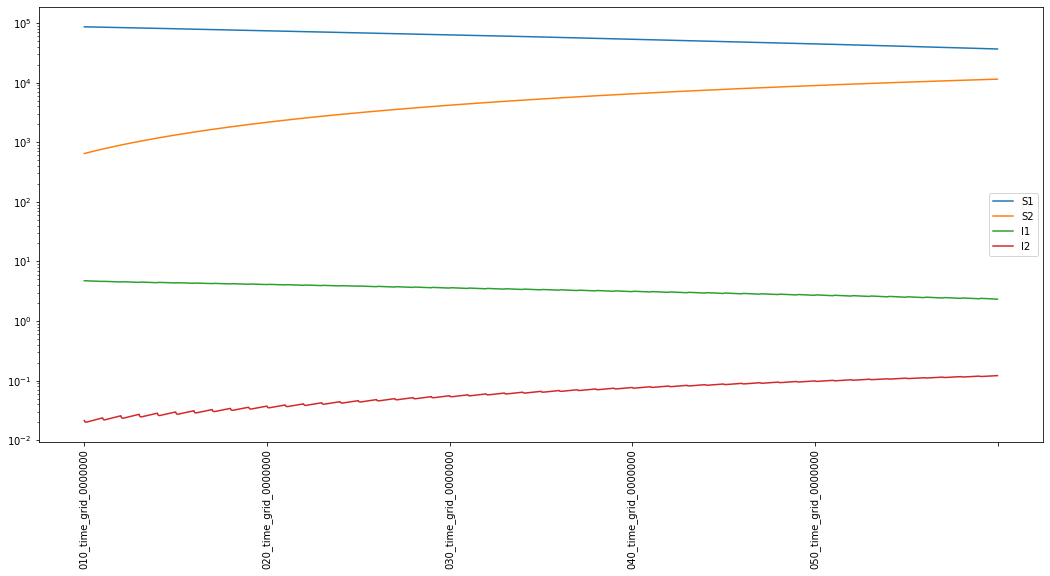

In [49]:
df_cut = df[df.index > '010_time_grid'].copy()
fig , ax = plt.subplots(figsize=(18,8))
df_cut[['S1','S2','I1','I2']].plot(ax=ax)
plt.xticks(rotation =90)
plt.yscale(value='log')
plt.show()

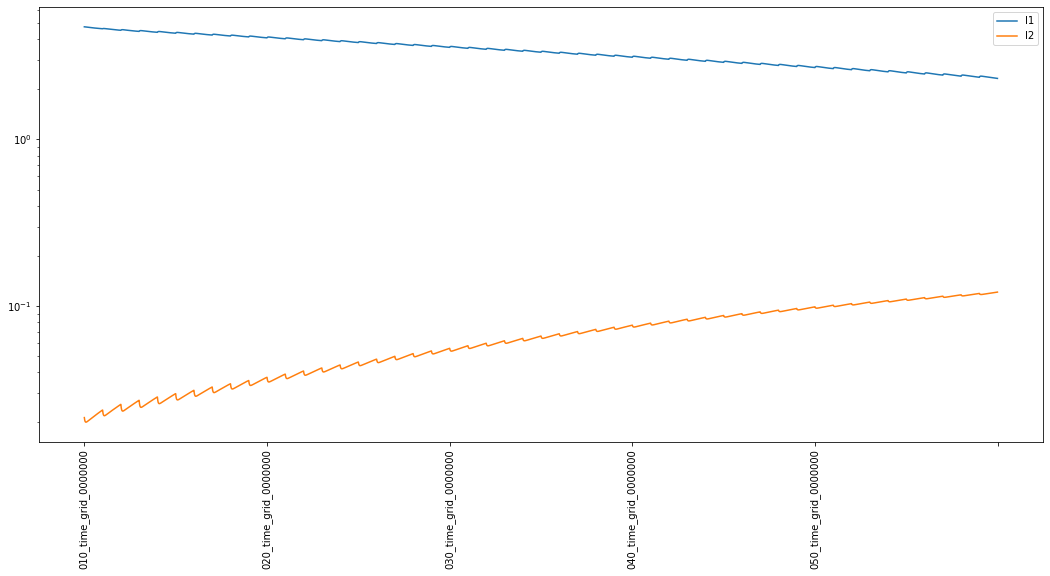

In [50]:
fig , ax = plt.subplots(figsize=(18,8))
df_cut[['I1','I2']].plot(ax=ax)
plt.xticks(rotation =90)
plt.yscale(value='log')
plt.show()

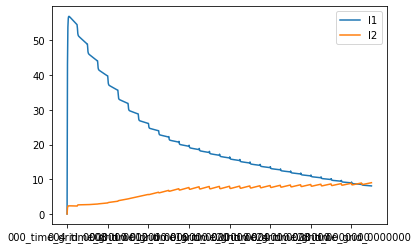

In [ ]:
for state in model.LIST_STATES:
  list_cols = [col for col in df.columns if state in col]
  df[state] = df[list_cols].mean(axis=1)
df[['I1','I2']].plot()

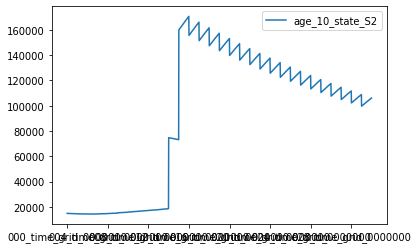

In [ ]:
df[['age_10_state_S2']].plot()